In [1]:
import numpy as np
import matplotlib.pyplot as plt
import analyze
from analyze import CallAggregator
from scipy import interpolate
from matplotlib.ticker import MultipleLocator, FixedLocator, NullFormatter

In [2]:
data = analyze.load_pickle(eur_only = False)

In [3]:
print(data.keys())

dict_keys(['nloci', 'ncalls', 'ngenotypes', 'ncorrect_unphased', 'ncorrect_phased', 'ncalls_not_in_ref', 'sample_acc', 'loci_acc', 'unphased_call_calibration', 'phased_call_calibration', 'unphased_genotype_calibration', 'max_chrom', 'done'])


In [31]:
print(data['loci_acc'])

{'1': {'842617': [49, 37], '886040': [49, 49], '930889': [49, 47], '937563': [49, 43], '945862': [48, 47], '984145': [37, 32], '992119': [48, 44], '1048570': [49, 45], '1112699': [49, 48], '1125628': [49, 49], '1165843': [49, 49], '1305184': [48, 48], '1501480': [49, 49], '1520671': [49, 46], '1522603': [32, 30], '1522778': [48, 48], '1524541': [48, 42], '1524799': [47, 46], '1548711': [49, 48], '1734203': [49, 48], '1740064': [49, 45], '1760314': [49, 49], '1771132': [49, 49], '1775829': [49, 40], '1798075': [49, 48], '1829122': [49, 48], '1833758': [49, 46], '1835864': [49, 46], '1836973': [32, 28], '1867307': [49, 48], '1867655': [41, 36], '1868344': [49, 35], '1984555': [49, 42], '2016446': [49, 49], '2030088': [49, 48], '2086885': [42, 42], '2091672': [49, 40], '2095174': [49, 45], '2157692': [49, 48], '2175396': [49, 49], '2211815': [49, 47], '2253996': [49, 47], '2256681': [46, 45], '2274263': [48, 14], '2302101': [49, 46], '2329414': [49, 49], '2353703': [49, 49], '2354604': [4

# Analysis of unphased call calibration

Total calls: 805396
Overall accuracy: 93.28%


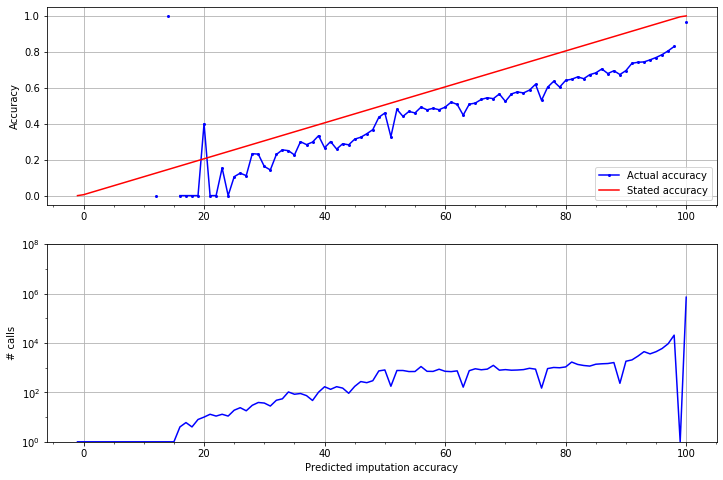

In [28]:
print("Total calls: {}".format(data['ncalls']))
print("Overall accuracy: {:.2%}".format(data['ncorrect_unphased']/data['ncalls']))

ucc = data['unphased_call_calibration']
rng = range(-1, len(ucc.call_bins)-1) #this puts true 0 calls at -1 and true 1 calls at 100
results = np.full(len(ucc.call_bins), np.nan)
call_iter = iter(ucc.call_bins.values())
success_iter = iter(ucc.success_bins.values())
idx = -1
while True:
    idx += 1
    call_num = next(call_iter, None)
    success_num = next(success_iter, None)
    if call_num is None:
        break
    if call_num == 0:
        continue
    results[idx] = success_num/call_num

figure = plt.figure(figsize=(12,8))    
#plot estimated accuracy vs true accuracy
ax1 = figure.add_subplot(2,1,1)
ax1.plot(rng, results, 'b-o', ms=2, label='Actual accuracy')
expectedResults = np.arange(0, 1, ucc.bin_size)
expectedResults += ucc.bin_size/2
expectedResults = np.concatenate(([0], expectedResults, [1]), axis=0)
ax1.plot(rng, expectedResults, 'r', label='Stated accuracy')
ax1.grid(True)
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.set_ylabel('Accuracy')
ax1.legend()
#plot estimated accuracy vs num calls with this estimate
ax2 = figure.add_subplot(2,1,2)

ys = np.array(list(ucc.call_bins.values()))
ys[ys == 0] = 1
ax2.plot(rng, ys, 'b-', ms=2)
ax2.set_yscale('log')
ax2.set_ylim((1, 1e8))
ax2.grid(True)
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(FixedLocator(np.array([10**x for x in range(0, 8)])))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_xlabel('Predicted imputation accuracy')
ax2.set_ylabel('# calls')
figure.show()

#TODO add error bars
#TODO do this with smoothing instead of bins

### Conclusion: Beagle over estimates its accuracy by ~5-10%

# Unphased calls by Locus 

Reading in data ...
Sorting ...
Plotting ...


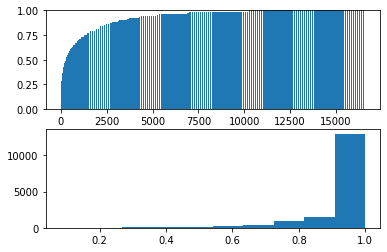

In [41]:
loc_acc = data['loci_acc']
accs = [] 
print("Reading in data ...")
for chrom in loc_acc.keys():
    chrom = str(chrom)
    for loc in loc_acc[chrom].values():
            if loc[0] > 0:
                accs.append(loc[1]/loc[0])
figure = plt.figure()
print("Sorting ...")
accs.sort()

print("Plotting ...")
ax1 = figure.add_subplot(2,1,1)
ax1.bar(np.arange(len(accs)), accs)
ax1.set_ylim(0,1)

ax2 = figure.add_subplot(2,1,2)
ax2.hist(accs)
pass

# Unphased call by Sample

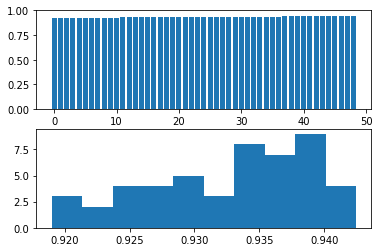

In [6]:
sample_acc = data['sample_acc']
accs = [] 
for sample in sample_acc:
        accs.append(sample_acc[sample][1]/sample_acc[sample][0])
figure = plt.figure()
accs.sort()

ax1 = figure.add_subplot(2,1,1)
ax1.bar(range(len(accs)), accs)
ax1.set_ylim(0,1)

ax2 = figure.add_subplot(2,1,2)
ax2.hist(accs)
pass

### Conclusion: samples all have roughly the same accuracy

# Unphased genotypes

In [9]:
print(data['ngenotypes'], data['unphased_genotype_calibration'].ncalls)

{'1': 860310.0} 42072498


Total genotypes: 860310.0


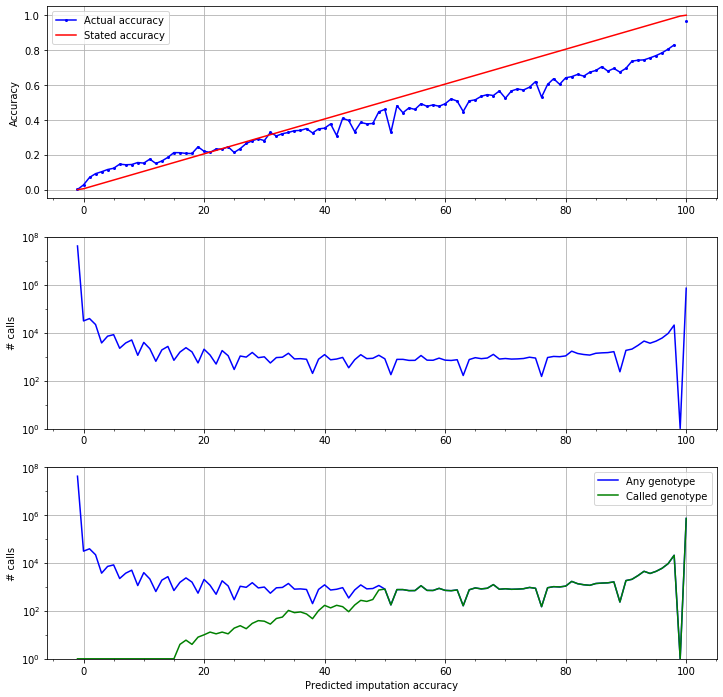

In [27]:
print("Total genotypes: {}".format(data['ngenotypes']['1']))

ugc = data['unphased_genotype_calibration']
rng = range(-1, len(ugc.call_bins)-1) #this puts true 0 calls at -1 and true 1 calls at 100
results = np.full(len(ugc.call_bins), np.nan)
call_iter = iter(ugc.call_bins.values())
success_iter = iter(ugc.success_bins.values())
idx = -1
while True:
    idx += 1
    call_num = next(call_iter, None)
    success_num = next(success_iter, None)
    if call_num is None:
        break
    if call_num == 0:
        continue
    results[idx] = success_num/call_num

figure = plt.figure(figsize=(12,12))    
#plot estimated accuracy vs true accuracy
ax1 = figure.add_subplot(3,1,1)
ax1.plot(rng, results, 'b-o', ms=2, label='Actual accuracy')
expectedResults = np.arange(0, 1, ugc.bin_size)
expectedResults += ugc.bin_size/2
expectedResults = np.concatenate(([0], expectedResults, [1]), axis=0)
ax1.plot(rng, expectedResults, 'r', label='Stated accuracy')
ax1.set_ylabel('Accuracy')
ax1.grid(True)
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.legend()

#plot estimated accuracy vs num genotypes with this estimate
ax2 = figure.add_subplot(3,1,2)

ys = np.array(list(ugc.call_bins.values()))
ys[ys == 0] = 1
ax2.plot(rng, ys, 'b-', ms=2)
ax2.set_yscale('log')
ax2.set_ylim((1, 1e8))
ax2.grid(True)
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(FixedLocator(np.array([10**x for x in range(0, 8)])))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_ylabel('# calls')
figure.show()

#plot num calls with this estimate and num genotypes with this estimate
ax3 = figure.add_subplot(3,1,3)

ys1 = np.array(list(ugc.call_bins.values()))
ys1[ys1 == 0] = 1
ys3 = np.array(list(data['unphased_call_calibration'].call_bins.values()))
ys3[ys2 == 0] = 1
ax3.plot(rng, ys1, 'b-', ms=2, label="Any genotype")
ax3.plot(rng, ys2, 'g-', ms=2, label="Called genotype")
ax3.set_yscale('log')
ax3.set_ylim((1, 1e8))
ax3.grid(True)
ax3.xaxis.set_minor_locator(MultipleLocator(5))
ax3.yaxis.set_minor_locator(FixedLocator(np.array([10**x for x in range(0, 8)])))
ax3.yaxis.set_minor_formatter(NullFormatter())
ax3.set_xlabel('Predicted imputation accuracy')
ax3.legend()
ax3.set_ylabel('# calls')
figure.show()


#TODO add error bars
#TODO do this with smoothing instead of bins

In [ ]:
#reference
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep
#can't get this to work ...
#maybe because there are duplicate x values?
#maybe because the x-values aren't sorted?
ucc = data['unphased_call_calibration']
spline = interpolate.splrep(ucc.calls[:ucc.ncalls], np.array(ucc.call_successes[:ucc.ncalls], dtype=float), s = 100000, xb=0, xe=1)
xs = np.linspace(0, 1, 1000)
ys = interpolate.splev(xs, spline)
plt.plot(xs, ys)